In [34]:
import numpy as np
import pandas as pd

# plot
import matplotlib.pyplot as plt
import urllib.request

# tf
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

## URL Dataset

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


url relative path ke dataset

In [36]:
url = '/content/drive/MyDrive/Dataset'

# Data Train & Validation

Disini saya menggunakan Image data generator dan batch size sebanyak 128
untuk validation, saya menggunakan 20% data.
Kemudian untuk subset training dan validation, target size nya adalah 120.

In [37]:
batch_size = 128

train_image_generator = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.3,
    rotation_range=45,
    horizontal_flip=True,
    )

train = train_image_generator.flow_from_directory(
    url, 
    target_size=(120,120),
    batch_size=batch_size, 
    subset='training'
    )

val = train_image_generator.flow_from_directory(
    url, 
    target_size=(120,120),
    batch_size=batch_size,
    subset='validation'
    )

Found 3116 images belonging to 5 classes.
Found 1333 images belonging to 5 classes.


# Model 

Pada syntax di atas model dibentuk dengan suatu layer convo 2 dimensi dari size 120 x 120 pixels dimana fungsi aktivasinya adalah. Terdapat dua pembuatan layer convo, sehingga dilanjutkan dengan pembuatan layer max pooling dan pembuatan layer dropout. Karena ini adalah pelatihan deep learning maka perlu pelatihan lagi dengan membuat lagi layer untuk pelatihan. Kemudian dilanjutkan dengan layer flatten dan layer dense sampai dengan proses kompilasi.



In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        64, 
        (3,3), 
        activation='relu',
        input_shape=(120, 120, 3), 
        padding='same'
        ),

      tf.keras.layers.Conv2D(
        64, (3,3), 
        activation='relu',
        input_shape=(120, 120, 3),
        padding='same'
        ),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(
        256, 
        (3,3), 
        activation='relu', 
        padding='same'
        ),
    
    tf.keras.layers.Conv2D(
      256, 
      (3,3), 
      activation='relu',
      padding='same'
      ),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')     
])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])


In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 120, 120, 64)      1792      
                                                                 
 conv2d_19 (Conv2D)          (None, 120, 120, 64)      36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 60, 60, 64)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 60, 60, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 256)       147712    
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 256)       590080    
                                                      

In [40]:
steps, val_steps = train.n/batch_size, val.n/batch_size
num_epochs = 50

epoch dibuat sebanyak 50

In [41]:
history = model.fit(train, validation_data=val, epochs=num_epochs,
                    steps_per_epoch=steps, validation_steps=val_steps)

Epoch 1/50
24/24 [==============================] - 36s 1s/step - loss: 2.2400 - accuracy: 0.2516 - val_loss: 1.5423 - val_accuracy: 0.2903
Epoch 2/50
24/24 [==============================] - 30s 1s/step - loss: 1.5156 - accuracy: 0.3155 - val_loss: 1.5586 - val_accuracy: 0.3653
Epoch 3/50
24/24 [==============================] - 30s 1s/step - loss: 1.4522 - accuracy: 0.3623 - val_loss: 1.4669 - val_accuracy: 0.3383
Epoch 4/50
24/24 [==============================] - 31s 1s/step - loss: 1.4028 - accuracy: 0.3678 - val_loss: 1.4347 - val_accuracy: 0.3578
Epoch 5/50
24/24 [==============================] - 30s 1s/step - loss: 1.3688 - accuracy: 0.3960 - val_loss: 1.4020 - val_accuracy: 0.3683
Epoch 6/50
24/24 [==============================] - 31s 1s/step - loss: 1.3082 - accuracy: 0.4249 - val_loss: 1.3584 - val_accuracy: 0.4029
Epoch 7/50
24/24 [==============================] - 31s 1s/step - loss: 1.2985 - accuracy: 0.4393 - val_loss: 1.3066 - val_accuracy: 0.4456
Epoch 8/50
24/24 [==

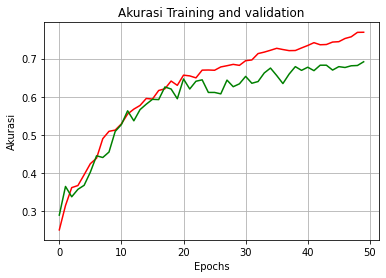

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training')
plt.plot(epochs, val_acc, 'g', label='Akurasi Validation')

plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.title('Akurasi Training and validation')
plt.grid(axis='both')

plt.show() 